# MNIST - Ensemble Learning
In this code exercise we are going to practice on creating different models. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier

np.random.seed(42)

# Data
Load the MNIST data and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing).You can use the code below: 

```python
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)
```

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

# Modelling
Instantiate a (1) Random Forest, (2) ExtraTree and (3) LinearSVC model. You can use this code:
```python
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
```
Train the models on the training data and print out the score for each model on the validation data (what does the score method do?). Example on using the score method:

```python
my_model_name.score(X_val, y_val)
```

In [4]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)

In [5]:
random_forest = random_forest_clf.fit(X_train,y_train)
random_forest.score(X_val, y_val)

0.9692

In [6]:
extra_trees = extra_trees_clf.fit(X_train,y_train)
extra_trees.score(X_val, y_val)

0.9715

In [7]:
svm = svm_clf.fit(X_train,y_train)
svm.score(X_val, y_val)

0.859

**Voting classifier**

Create a voting classifier, train it on the training data and evaluate it on the validation data using the score method. 
Some code to help: 

```python
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf)
]

voting_clf = VotingClassifier(named_estimators)
```

In [8]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf)
]

voting_clf = VotingClassifier(named_estimators)

In [9]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_val, y_val)

0.9693

In [10]:
for classifiers in (random_forest_clf, extra_trees_clf, svm_clf, voting_clf):
    classifiers.fit(X_train, y_train)
    y_pred = classifiers.predict(X_test)
    print(classifiers.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9645
ExtraTreesClassifier 0.9691
LinearSVC 0.8566
VotingClassifier 0.965


# Evaluate your best model on the test set. 

In [11]:
y_pred1 = random_forest_clf.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy for random forest classifier: ") 
print(accuracy1)

Accuracy for random forest classifier: 
0.9645


In [12]:
y_pred2 = extra_trees_clf.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy for extra trees classifier: ") 
print(accuracy2)

Accuracy for extra trees classifier: 
0.9691


In [13]:
print("Accuracy for linear support vector classifier: ") 
y_pred3 = svm_clf.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print(accuracy3)

Accuracy for linear support vector classifier: 
0.8566


In [14]:
print("Accuracy for voting classifier: ") 
y_pred4 = voting_clf.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print(accuracy4)

Accuracy for voting classifier: 
0.965


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

Confusion matrix for random forest classifier: 


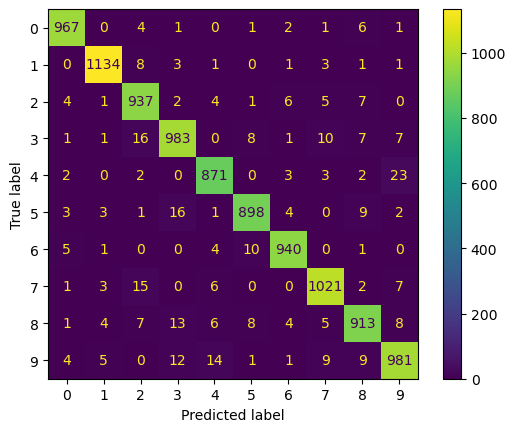

In [16]:
print("Confusion matrix for random forest classifier: ") 
display_confusion_matrix(y_test,y_pred1)

Confusion matrix for extra trees classifier: 


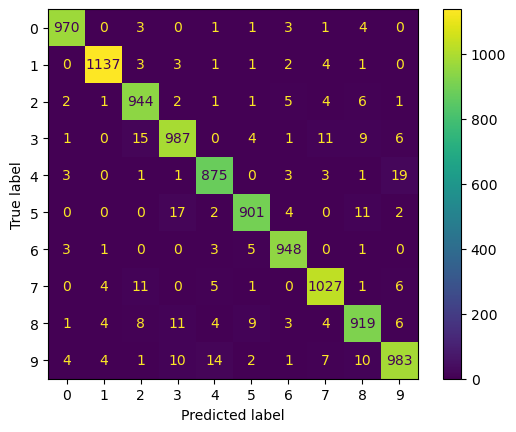

In [17]:
print("Confusion matrix for extra trees classifier: ") 
display_confusion_matrix(y_test,y_pred2)

Confusion matrix for linear support vector classifier: 


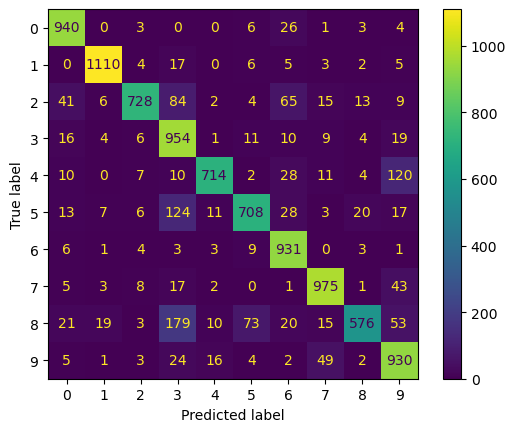

In [18]:
print("Confusion matrix for linear support vector classifier: ") 
display_confusion_matrix(y_test,y_pred3)

Confusion matrix for support voting classifier: 


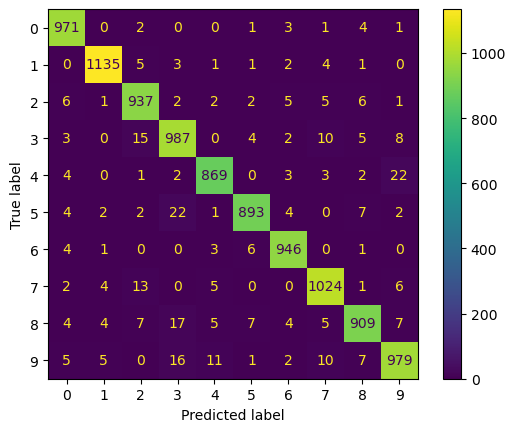

In [19]:
print("Confusion matrix for support voting classifier: ") 
display_confusion_matrix(y_test,y_pred4)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print("Classification report for random forest classifier: ") 
print() 
print(classification_report(y_test, y_pred1))

Classification report for random forest classifier: 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.98      0.98      0.98      1152
           2       0.95      0.97      0.96       967
           3       0.95      0.95      0.95      1034
           4       0.96      0.96      0.96       906
           5       0.97      0.96      0.96       937
           6       0.98      0.98      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.95      0.94      0.95       969
           9       0.95      0.95      0.95      1036

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [22]:
print("Classification report for extra trees classifier: ") 
print() 
print(classification_report(y_test, y_pred2))

Classification report for extra trees classifier: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.99      0.99      0.99      1152
           2       0.96      0.98      0.97       967
           3       0.96      0.95      0.96      1034
           4       0.97      0.97      0.97       906
           5       0.97      0.96      0.97       937
           6       0.98      0.99      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.95      0.95      0.95       969
           9       0.96      0.95      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [23]:
print("Classification report for linear support vector classifier: ") 
print() 
print(classification_report(y_test, y_pred3))

Classification report for linear support vector classifier: 

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       983
           1       0.96      0.96      0.96      1152
           2       0.94      0.75      0.84       967
           3       0.68      0.92      0.78      1034
           4       0.94      0.79      0.86       906
           5       0.86      0.76      0.80       937
           6       0.83      0.97      0.90       961
           7       0.90      0.92      0.91      1055
           8       0.92      0.59      0.72       969
           9       0.77      0.90      0.83      1036

    accuracy                           0.86     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.86      0.85     10000



In [24]:
print("Classification report for voting classifier: ") 
print() 
print(classification_report(y_test, y_pred4))

Classification report for voting classifier: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.95      0.97      0.96       967
           3       0.94      0.95      0.95      1034
           4       0.97      0.96      0.96       906
           5       0.98      0.95      0.96       937
           6       0.97      0.98      0.98       961
           7       0.96      0.97      0.97      1055
           8       0.96      0.94      0.95       969
           9       0.95      0.94      0.95      1036

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



# Summary and analysis
In this section, write down a summary of your work and some analysis. 

first we can see the dataset was split into training set, validation set and test set

next we instantiated the models and trained the validation data to get the score.
(what does the score method do?) in this case, score is used to method is used to calculate the accuracy of the model on the validation data.

upon checking the different accuracy scores for each models, we can see that the scores for the random tree classifier and the extra trees classifier has the highest accuracy score, albeit extra trees getting a little bit higher than the former. which makes extra trees classifier the best to use in this dataset. svm in this case is not an ideal model to use since it generates the lowest score and accuracy score. upon checking when using the confusion matrix and classfication report we can also see that the same thing happens again. now as for the voting classifier, it is a good way to get the average for the different models used for classification although it did not display the individual scores for each classifier used.

det första vi gjorde var att dela upp datan i x och y data, sedan dela vi upp det tränings, validerings och test data.

efter det så skapade vi våra modeler och tränade dem. sedan testa vi deras score med validerings datan. score metoden används för att kolla accuracyn av modelen på valideringsdatan.

det sista vi gjorde var att evaluera våra modeller.

extra trees modellen var den som presterade bäst och svm modellen var den som presterade sämst.

random forest modellen samt voting modellan var bara snäppet sämre än extra tees modellen medan svm modellen presterade mycket sämre än resten.

anledningen till att voting modellan presterar så likt de två bättre modellerna tror vi är pågrund av att modellen är en kombination av alla det andra tre modellerna, där det två bättre modellerna har en röst majoritet och därför påverkas den inte så mycket av den sämsta modellens predictioner